### 💻 **Cloud Cost Monitoring and Resource Optimization Anomalies**

### 🎯 **Project Objective**

Monitor unusual fluctuations in cloud storage or computing resource costs that deviate from typical usage patterns. Anomaly detection is used to detect unexpected surges in usage or resource consumption that could result in higher-than-expected costs, allowing cloud providers like Backblaze to manage costs and optimize resource allocation efficiently.


### 🧾 **Feature List**

In [1]:
feature_list = [
    "user_id",
    "storage_usage_GB",
    "compute_usage_hours",
    "network_bandwidth_GB",
    "resource_type",
    "usage_cost",
    "avg_cost_per_GB",
    "avg_compute_cost_per_hour",
    "time_of_day",
    "day_of_week",
    "previous_usage",
    "user_activity_level",
    "unexpected_usage",
    "usage_trend",
    "cost_per_hour",
    "contract_type",
    "savings_plan"
]


### 📦 **Step 1: Import Required Libraries**

In [2]:
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import seaborn as sns
import matplotlib.pyplot as plt

### 🧑‍💻 **Step 2: Generate Synthetic User Behavior Data**

In [3]:
def simulate_cost_data(num_samples):
    data = pd.DataFrame({
        'user_id': range(num_samples),
        'storage_usage_GB': np.random.uniform(50, 1000, num_samples),  # Cloud storage usage in GB
        'compute_usage_hours': np.random.uniform(5, 200, num_samples),  # Compute usage in hours
        'network_bandwidth_GB': np.random.uniform(10, 500, num_samples),  # Network bandwidth in GB
        'resource_type': np.random.choice(['storage', 'compute', 'network'], num_samples),  # Resource type
        'usage_cost': np.random.uniform(10, 500, num_samples),  # Cost associated with usage
        'avg_cost_per_GB': np.random.uniform(0.02, 0.1, num_samples),  # Average cost per GB
        'avg_compute_cost_per_hour': np.random.uniform(0.1, 1.0, num_samples),  # Average cost per compute hour
        'time_of_day': np.random.choice(['morning', 'afternoon', 'evening'], num_samples),  # Time of day
        'day_of_week': np.random.choice(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], num_samples),  # Day of the week
        'previous_usage': np.random.uniform(50, 1000, num_samples),  # Previous period usage (for fluctuation detection)
        'user_activity_level': np.random.choice(['low', 'medium', 'high'], num_samples),  # User activity level
        'unexpected_usage': np.random.choice([0, 1], num_samples, p=[0.95, 0.05]),  # Anomalous usage flag (target)
        'usage_trend': np.random.choice(['increase', 'decrease', 'stable'], num_samples),  # Trend of usage
        'cost_per_hour': np.random.uniform(0.2, 3.0, num_samples),  # Cost per unit of compute or storage resource
        'contract_type': np.random.choice(['pay-as-you-go', 'subscription'], num_samples),  # Contract type
        'savings_plan': np.random.choice([0, 1], num_samples, p=[0.8, 0.2])  # Savings plan indicator
    })
    return data

# Generate synthetic test data
test_data = simulate_cost_data(200)

# Inject anomalies (usage spikes, cost surges)
anomaly_indices = random.sample(range(len(test_data)), 10)  # Select random indices for anomalies
test_data.iloc[anomaly_indices, 1] += 500  # Inflate storage usage (simulate spike)
test_data.iloc[anomaly_indices, 2] += 100  # Inflate compute usage (simulate spike)
test_data.iloc[anomaly_indices, 5] += 200  # Inflate usage cost (simulate spike)

# Ensure that categorical features are properly encoded
test_data_encoded = test_data.copy()
test_data_encoded['time_of_day'] = test_data_encoded['time_of_day'].astype('category').cat.codes
test_data_encoded['resource_type'] = test_data_encoded['resource_type'].astype('category').cat.codes
test_data_encoded['day_of_week'] = test_data_encoded['day_of_week'].astype('category').cat.codes
test_data_encoded['user_activity_level'] = test_data_encoded['user_activity_level'].astype('category').cat.codes
test_data_encoded['usage_trend'] = test_data_encoded['usage_trend'].astype('category').cat.codes
test_data_encoded['contract_type'] = test_data_encoded['contract_type'].astype('category').cat.codes

# Double-check the data types after encoding
print(test_data_encoded.dtypes)

# Standardizing or scaling the test data (make sure all columns are numerical)
scaler = StandardScaler()
test_data_scaled = scaler.fit_transform(test_data_encoded.drop(columns=['user_id', 'unexpected_usage']))

user_id                        int64
storage_usage_GB             float64
compute_usage_hours          float64
network_bandwidth_GB         float64
resource_type                   int8
usage_cost                   float64
avg_cost_per_GB              float64
avg_compute_cost_per_hour    float64
time_of_day                     int8
day_of_week                     int8
previous_usage               float64
user_activity_level             int8
unexpected_usage               int32
usage_trend                     int8
cost_per_hour                float64
contract_type                   int8
savings_plan                   int32
dtype: object


### 🤖 **Step 3: Train the Model Using Isolation Forest**

In [4]:
# Define the model for anomaly detection (Isolation Forest)
model = IsolationForest(contamination=0.05)  # Assume 5% of data are anomalies
model.fit(test_data_scaled)

# Predict anomalies on the test data
test_data_encoded['predicted_anomaly'] = model.predict(test_data_scaled)
test_data_encoded['predicted_anomaly'] = test_data_encoded['predicted_anomaly'].map({1: 0, -1: 1})  # 0 for normal, 1 for anomaly

# Extract anomalies for inspection
anomalies = test_data_encoded[test_data_encoded['predicted_anomaly'] == 1]

# Display the detected anomalies
anomalies.head()

,user_id,storage_usage_GB,compute_usage_hours,network_bandwidth_GB,resource_type,usage_cost,avg_cost_per_GB,avg_compute_cost_per_hour,time_of_day,day_of_week,previous_usage,user_activity_level,unexpected_usage,usage_trend,cost_per_hour,contract_type,savings_plan,predicted_anomaly
11,11,423.755872,193.602030,415.528879,0,111.400911,0.025047,0.326203,2,0,790.253032,1,0,2,1.784902,0,1,1
18,18,1180.403394,156.588143,92.751677,1,685.881218,0.025096,0.584775,1,4,110.479962,1,0,1,1.540868,0,0,1
24,24,113.629782,13.519578,158.060368,2,470.292534,0.031917,0.887367,2,2,139.336121,0,0,0,1.410061,1,1,1
75,75,153.968189,31.775362,496.255533,0,474.215787,0.025008,0.973553,1,4,954.742506,2,0,1,0.312495,0,0,1
95,95,394.985867,28.866616,164.101630,2,218.875125,0.039730,0.993303,1,4,341.144031,2,0,0,2.796961,1,1,1


### 📈 **Step 4: Plot Anomaly Scores Distribution**

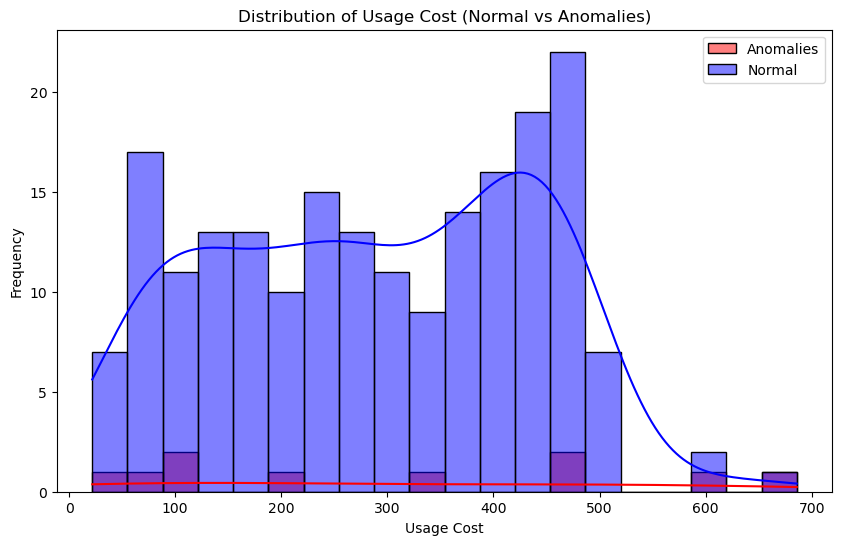

In [5]:
# Plot anomaly distribution (Usage cost and storage usage)
plt.figure(figsize=(10, 6))
sns.histplot(anomalies['usage_cost'], bins=20, color='red', label="Anomalies", kde=True)
sns.histplot(test_data_encoded['usage_cost'], bins=20, color='blue', label="Normal", kde=True)
plt.title("Distribution of Usage Cost (Normal vs Anomalies)")
plt.xlabel("Usage Cost")
plt.ylabel("Frequency")
plt.legend()
plt.show()

### 📈 **Step 5: Evaluate Model Performance**

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       190
           1       0.30      0.30      0.30        10

    accuracy                           0.93       200
   macro avg       0.63      0.63      0.63       200
weighted avg       0.93      0.93      0.93       200



C:\Users\USER\AppData\Local\Temp\ipykernel_17980\3310763794.py:22: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


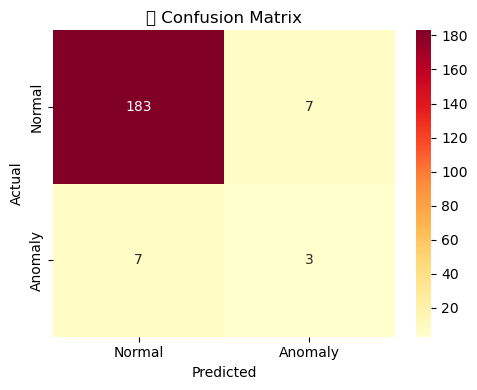

In [6]:
from sklearn.metrics import classification_report, confusion_matrix

anomaly_indices = random.sample(range(len(test_data)), 10)

# Step 1: Create ground truth (true labels)
test_data_encoded['true_label'] = 0
test_data_encoded.loc[anomaly_indices, 'true_label'] = 1

# Step 2: Classification report
print("📊 Classification Report:")
print(classification_report(test_data_encoded['true_label'], test_data_encoded['predicted_anomaly']))

# Step 3: Confusion matrix
cm = confusion_matrix(test_data_encoded['true_label'], test_data_encoded['predicted_anomaly'])

# Step 4: Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlOrRd", xticklabels=["Normal", "Anomaly"], yticklabels=["Normal", "Anomaly"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("📉 Confusion Matrix")
plt.tight_layout()
plt.show()

In [7]:
# Export anomalies to CSV
anomalies.to_csv('anomalies_cloud_cost_monitoring.csv', index=False)
